# Lotka-Volterra in Drug Discovery

The Lotka-Volterra Model is not limited to predator-prey models. It has been applied over the past few decades to
the study of evolutionary biology. When treating humans or animals with drugs that aim to rid the body
of pathogens or cancerous cells, natural evolution is at play and the organism (or virus) utilizes survival mechanisms
to adapt. This is problematic for humans - it invites organisms to evolve into drug-resistant forms.

Adaptive therapy strategies have been replacing maximum tolerant dose treatment for some cancers in order to maintain
a level of therapy-sensitive cells in the tumor {cite:p}`enriquez2015application`. This prevents the therapy-resistant
cells from thriving because they are forced to compete for
resources with the therapy-sensitive cells. The goal of adaptive therapy is to maintain control of tumor growth while
also suppressing the growth of therapy-resistant cells. The competitive dynamics between these sensitive and resistant
cells can be modeled using the competitive Lotka-Volterra system.

{cite:t}`zhang2017integrating` created a Lotka-Volterra model to compare the mechanisms of treating metastatic castrate-
resistant prostate cancer with Abiraterone, a drug that inhibits a protein, CYP17A1, involved in androgen synthesis.
The population dynamics of the T+ cells, which require exogenous androgen, TP cells, which express CYP17A1, and T- cells,
which are resistant to the drug, are modeled using the competitive Lotka-Volterra equations.

> $ \frac{dx_i}{dt}=r_ix_i(1-\frac{\sum_{j=1}^{3} a_{ij}x_j}{K_i}) $

In this case, N = 3 since there are 3 different types of cells interacting with each other and competing for
resources.

Using the parameter information for patient #1 that was published in the article, we can apply the Lotka-Volterra model
to see the dynamics of the cell populations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint as ode

init_pop = [2500, 3000, 0] # initial population levels [prey, predator]

t_steps = 1000 # time steps
t_end = 10000 # end of time interval
time = np.linspace(0, t_end, num=t_steps) # array to store time

grow_rate = [0.278, 0.355, 0.665] # growth rate of cells
grow_rate = [.01 * i for i in grow_rate] # author state it was an overestimation of growth_rate by 10%

# matrix to track interaction coefficients
A = [[1, 0.7, 0.8],
     [0.4, 1, 0.5],
     [0.6, 0.9, 1]]

k = [1.5, 10000, 10000] # carrying capacity (T+ is dynamic, but I leave it as static for this example)

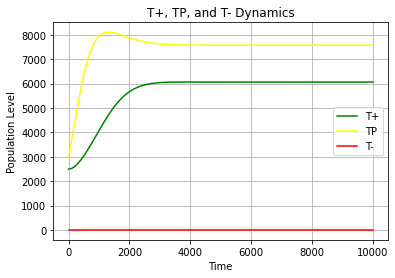

In [2]:
# Define the simulation function
def run_simu(tmp_pop, tmp_time, tmp_A):

    tmp_x = tmp_pop[0] # T+ population value
    tmp_y = tmp_pop[1] # TP population value
    tmp_z = tmp_pop[2] # T- population value

    dxdt = grow_rate[0] * tmp_x * (1 - (tmp_A[0][0] * tmp_x + tmp_A[0][1] * tmp_y + tmp_A[0][2] * tmp_z)/(k[0]*tmp_y))
    dydt = grow_rate[1] * tmp_y * (1 - (tmp_A[1][0] * tmp_x + tmp_A[1][1] * tmp_y + tmp_A[1][2] * tmp_z)/k[1])
    dzdt = grow_rate[2] * tmp_z * (1 - (tmp_A[2][0] * tmp_x + tmp_A[2][1] * tmp_y + tmp_A[2][2] * tmp_z)/k[2])

    return[dxdt, dydt, dzdt]

# Call the ode solver function
output = ode(run_simu, init_pop, time, args = (A,))

plt.plot(time, output[:,0], color = "green", label = "T+") # Prey output
plt.plot(time, output[:,1], color = "yellow", label = "TP") # Prey output
plt.plot(time, output[:,2], color = "red", label = "T-") # Prey output

plt.xlabel("Time")
plt.ylabel("Population Level")

plt.title("T+, TP, and T- Dynamics")
plt.legend()
plt.grid()

plt.show()

The plot displays the results of the solutions to the model if the tumor was left without intervention - cancer cell
levels reaching deadly levels. The next steps would be to model the different treatment interventions and simulate the
cell populations. In this manner, one can predict which treatment is better for patient #1. After applying the different
therapies to the model, the authors found that the adaptive therapy prevented the growth of T- cells for a much longer
period than the state-of-the-art treatment of maximum tolerant dose.

The model has many limitations. The authors state these limitations and express the need for further research with more
data. The underlying assumption that the treatment sensitive and treatment resistant cells
compete with each other in the tumor is not confirmed. Perhaps it is the dynamic for this particular cancer, but
for more heterogeneous and less spatially constrained tumors, this basic Lotka-Volterra model might not be sufficient.

There are many other applications of the Lotka-Volterra model in drug discovery. A related field to the competition of
therapy sensitive and therapy resistant cancerous cells is the competition between therapy resistant and
sensitive strains of viruses. Neuraminidase inhibitors (NAI) include oseltamivir, zanamivir, and peramivir, which are the main antiviral
drugs approved to treat viral infections. Understanding the viral fitness of within host and between host strains of
influenza virus NAI-resistant and sensitive strains is important for future drug development and dosing strategies.
{cite:t}`dimas2020modeling` used the Lotka-Volterra Model to predict population dynamics of within host and between
host fitness of these influenza virus strains in ferrets.

Another application of the Lotka-Volterra model deals with primary infections and their secondary, opportunisitc infections,
such as HIV with *Mycobacterium tuberculosis* or HIV with *Candida albicans*. Co-infections can inhibit
success of drug interventions so understanding the dynamics of coinfections is essential for successful therapy.
{cite:t}`eswarappa2012within` used the Lotka-Volterra equations to model different coinfection dynamics.
The pathogen species can have very distinct
interactions ranging from a relationship of reciprocal facilitation to competition. The authors modeled these different
types of relationships and found, not surprisingly, that reciprocal facilitation of the two pathogens could cause the most harm for the host.
